# Phase 1 Project: Movie Box Office Successes 
### A case study

![title](img/jaws_title.jpg)

**Pictured above:** *Jaws, considered the first ever summer blockbuster, completely redefined what it meant for a movie to be succesful and what movie studios looked for in movie hits. Times have changed (Nowadays a movie’s success can’t be measured in the literal number of blocks the box office line circles) but it is still important to ask questions about how to replicate the success in the same way movie studios did in the 1970s after the release of this classic.* 

## 1. Introduction

This project will seek to draw conclusions from data with regards to a business case. 

#### The business case:

With the success that Netflix and other streaming services have seen from creating original movie productions in-house, Microsoft has decided to chip into the fun and start its own movie studio. Because they’re the new kids in the block, they need help finding out what can they learn from box office hits. Hopefully, Microsoft will use these insights and recommendations to decide where they want their studio to head in the future.


The goal of this project is to put in practice the skills related to data pre-processing, data visualization and insights from data.

The scope of this project includes:
    
- Use the provided data files 
- Answer 3 questions that will yield actionable business insights.
- Use visualizations to explain the conclussions
 
The project will be based in the following three questions:
- How does time of release affect movie success?
- What is the most successful movie genre?
- How has the genre distribution changed in the last couple of decades? 

## 2. Pre-processing the Data

#### Importing the data packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
!ls zippedData/

bom.movie_gross.csv.gz       imdb.title.ratings.csv.gz
imdb.name.basics.csv.gz      rt.movie_info.tsv.gz
imdb.title.akas.csv.gz       rt.reviews.tsv.gz
imdb.title.basics.csv.gz     tmdb.movies.csv.gz
imdb.title.crew.csv.gz       tn.movie_budgets.csv.gz
imdb.title.principals.csv.gz


The data needs to be imported as pandas data frames. In order to do this, it is important to be mindful of:
- 1. The encoding format
- 2. The delimiter

Just by trying to open the csv files, it is evident that the Rotten Tomatoes file has a diferent separator: it uses a **'\t'** to delimit different values of the data, so the argument "delimiter" is included to let the function know.

It is also important to pass the correct encoding argument to the function when needed, and so that is what the second argument in the Rotten Tomatoes data is being fed. 

In [3]:
bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')#Domestic, Foreign, Year
imdb_ratings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip')#Avg Ratings, Num Ratings
imdb_basics = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip')

rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', delimiter='\t', encoding='iso-8859-1')
rt_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', delimiter='\t', encoding='iso-8859-1')


tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

Once the data has been 

### Pre-processing: Taking a peak at the data
- Understanding the data: Data types, number basic .info() of the data
- Questions to ask:
    - What's missing
    - What might affect/cause issues
    - What looks helpful at first sight


Let's take a quick look at the data by analyzing the first 5 rows of each data frame by calling the  `head()`  function.



In [4]:
imdb_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
imdb_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


These two previous data frame seem to be from  IMDB, and `imdb_ratings`  seems to be missing a movie titles column that lets us know which movie its talking about. However, the `tconst` column seems to serve as an ID for both dataframes, so we can relate the ratings of the `imdb_ratings` dataframe to the movies in `imdb_basics` using this column as an index. 

Let's look for the movie with the most votes and then check what the name is by looking the `tconst` value up in the `imbd_basics` data frame:

In [6]:
ratings_ordered = imdb_ratings.sort_values(by='numvotes', ascending=False)#Order movies by number of votes 
ratings_ordered = ratings_ordered.reset_index(drop=True)#Reset indexes in ordered df

imdb_basics.loc[imdb_basics['tconst'] == ratings_ordered.loc[0,'tconst']]#Find movie name of the first row of ratings_ordered

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
7066,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"


It looks like Inception (2010) has the most reviews in the IMDB data base, which actually makes sense, so let's assume the `tconst` is in fact the ID that relates both dataframes. 

Let's continue looking at the rest of the data frames:

In [7]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [9]:
rt_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


There doesn't seem to be a way to know the name of rotten tomatoes dataframes either, but really what we're looking for doesn't require knowing **any** movie's name, but rather we want to obtain insights from trends in other variables.

In [10]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Let's start thinking about what might be useful from these dataframes. We're interested in exploring *movies that are currently doing the best in the box office*. The easiest thing to do would be to analyze the highest grossing films and determine what they share in common, but that approach isn't considering the question "How do you consider a movie succesful?". Is it the movies that generate the most revenue? Is Microsoft interested in making the movies with the best ratings, meaning better content? or is it the movies with the most vote counts, signaling they're controversial and thus attract more viewers?

Hopefully, we'll gain the insights we need to help Microsoft understand the market through data, but we still need to think about these questions throughout the process. 

### Pre-processing: Missing Data and Other Issues

Now let's delve into more technical aspects of the data and start looking for things that could cause problems:

In [11]:
print(imdb_basics.describe())#getting information such as min,max, std. deviation about the dataframe
print(imdb_basics.info())#getting information about the number of variables and their datatypes 
print(imdb_basics.isna().sum())

          start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
tconst             146144 non-null object
primary_title      146144 non-null object
original_title     146123 non-null object
start_year         146144 non-null int64
runtime_minutes    114405 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
None
tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


We will repeat this past 3 lines of code for all of the dataframes to get a sense of the basic information regarding the data they contain. Also, we want to start checking if we're missing values for certain variables. By calling the `isna().sum()` chain of functions we can know how many `NaN` values the DataFrames contain. This process will be repeated for all of the dataframes in order to understand what we'll be dealing with here and the work that has to be done to fix the data. 

In [12]:
print(imdb_ratings.describe())
print(imdb_ratings.info())
print(imdb_ratings.isna().sum())

       averagerating      numvotes
count   73856.000000  7.385600e+04
mean        6.332729  3.523662e+03
std         1.474978  3.029402e+04
min         1.000000  5.000000e+00
25%         5.500000  1.400000e+01
50%         6.500000  4.900000e+01
75%         7.400000  2.820000e+02
max        10.000000  1.841066e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
None
tconst           0
averagerating    0
numvotes         0
dtype: int64


In [13]:
print(bom_gross.describe())
print(bom_gross.info())
print(bom_gross.isna().sum())

       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


In [14]:
print(rt_reviews.describe())
print(rt_reviews.info())
print(rt_reviews.isna().sum())

                 id    top_critic
count  54432.000000  54432.000000
mean    1045.706882      0.240594
std      586.657046      0.427448
min        3.000000      0.000000
25%      542.000000      0.000000
50%     1083.000000      0.000000
75%     1541.000000      0.000000
max     2000.000000      1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
id            54432 non-null int64
review        48869 non-null object
rating        40915 non-null object
fresh         54432 non-null object
critic        51710 non-null object
top_critic    54432 non-null int64
publisher     54123 non-null object
date          54432 non-null object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB
None
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64


In [15]:
print(rt_info.describe())
print(rt_info.info())
print(rt_info.isna().sum())

                id
count  1560.000000
mean   1007.303846
std     579.164527
min       1.000000
25%     504.750000
50%    1007.500000
75%    1503.250000
max    2000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dvd_date        1201 non-null object
currency        340 non-null object
box_office      340 non-null object
runtime         1530 non-null object
studio          494 non-null object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime       

In [16]:
print(tn_movie_budgets.describe())
print(tn_movie_budgets.info())
print(tn_movie_budgets.isna().sum())



                id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


From these pandas methods, we can quickly start looking at which variables might be useful, and which ones have too many issues associated with them (too many missing values, format issues etc.) Because we have **a lot** of information, we need to start thinking which DataFrames to use in the project. Of course if we had more time we could use all of them to draw conclussions, but for the scope of the project, we'll choose which DataFrames to keep and which ones to discard. 

From the methods above, there are a couple of things that caught my attention from each DataFrame:
- The `tn_movie_budgets` apparently contains no null values, so right off the bat it seems that it will be one most useful due to its completeness. It contains information about gross earnings of the movie, as well as information about its budget and release date. Something important to note about this dataframe is that the only `int` variable it contains is the ID. All of the other ‘numeric’ variables are stored as objects. This becomes apparent when you take a look at the budget and gross earnings, which all contain the dollar sign. This means the data will have to be formatted later in order to use this numbers in their correct data type. This datatype issue could also prevent us from spotting any placeholder values that might be in place for missing variables. These problems notwithstanding, **this seems to be a very complete DataFrame to use.** 


- The `rt_info` and `rt_ratings` dataframes come in what I will call a "sister DataFrame'. One of them contains information about the movies such as runtime and genre, while the other contains the information about the reviews. A quick glance at the sheer amount of missing values the DataFrame contains makes us wonder if in fact it is worth it to continue using this data for our purposes. For instance: there are 1560 movies in the `rt_info` DataFrame but there are 1220 missing values for box office (78% of the movies don't have box office data). Another important problem with the these DataFrames is that the column that would act as a key in order to relate the movies with their reviews is very messy. Just by looking at the `.head()` method from the reviews DataFrame we can see that the first 5 movies all have an ID value of 3, which produces the obvious problem of not being able to relate movie info to reviews. For these reasons, **neither of the Rotten Tomatoes DataFrames will be used in the project.**


- `Bom_gross` contains relevant information about gross earnings but no other variables to relate it to. In other words, we can know which movies had the highest earnings but we don't know anything about them. We could in theory "fusion" the information from this DataFrame to the others by using the movie title (which is provided in `Bom_gross`) but can confidently say that we have other alternatives, so we can afford to **not use this DataFrame for the rest of the project.** 


- Finally, the IMDB sister DataFrames not only include useful information about the movie such as genre, date and runtime, but it also has a correct ID variable that helps it link to its sister DataFrame containing the ratings. One thing that could be done is link these two DataFrames using the id as a key for the merge. There are no missing values in the `imdb_ratings` DataFrame and the `imdb_information` Dataframe contains very few null values compared with the overall movie count. Also, the numeric variables don’t need to be formatted because they already come in either float or int formats.  Pound per pound, **these Dataframes seem to be one of the best options to analyze for this project.**

### Pre-processing: Fixing the issues
Let's start fixing some of these issues as part of the pre-processing stage before we get ready to analyze any data.

The three main problems we'll have to fix are: 
- Fill in any missing values


- Fix any underlying datatype issues that will prevent us from reading the data correctly:
    - Fixing dates into a `datetime` format.
    
    - Numeric variables into float or int values.
    
    - Sort Genres into different categories (maybe using a one-hot encoder).
    
    
- Merge the IMDB DataFrames with the correct merge type and key. 

Let's start with IMDB the merge because that way we will get rid of movies that don't have rating information. We want to perform the merge using the `.join()` method. For this join, we want only movies that appear on both the info DataFrame, and the ratings DataFrame:

In [17]:
imdb_basics = imdb_basics.set_index('tconst')#Set the movie "ID" as the index
imdb_ratings = imdb_ratings.set_index('tconst')

In [18]:
imdb = imdb_basics.join(imdb_ratings, how='inner')
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


We now have only one IMDB DataFrame to handle. While we're at it, let's take a look at this new DataFrame and fix the other issues we mentioned:

In [19]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
primary_title      73856 non-null object
original_title     73856 non-null object
start_year         73856 non-null int64
runtime_minutes    66236 non-null float64
genres             73052 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


It looks like we have a total of 73,856 movies with title, start year, average rating and vote count. The only two variables that would need fixing are runtime minutes and genres. 

Movies with missing genres values will be discarded simply because we cannot estimate any central tendency value such as a mean, median or a mode that can serve to fill in a categorical variable.

Movies with missing runtime minutes will also be eliminated due to the sheer amount of data we have. In theory we could fill in the null values with the mean, but for the purposes of this project, eliminating them sounds like a good plan

In [20]:
imdb.dropna(inplace=True)#Drop rows that contain null values. 

In [21]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65720 entries, tt0063540 to tt9916160
Data columns (total 7 columns):
primary_title      65720 non-null object
original_title     65720 non-null object
start_year         65720 non-null int64
runtime_minutes    65720 non-null float64
genres             65720 non-null object
averagerating      65720 non-null float64
numvotes           65720 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.0+ MB


We'ver reduced the number of movies to 65,720 which is a lot of data still, so everything is looking good. Let's also check to see if there are any duplicates in this DataFrame so we can take care of that:

In [22]:
imdb.duplicated().sum()

0

Next, let's tackle the genres problem: how will we can we prepare this categorical data for later use? 

We see can see that the 'genres' column contains strings that contain the different genres that the movie was classified as. A movie could be catalogue as say, Action and Drama (2 or more genres) or simply as Horror(only one). This poses a challenge since we can't represent each movie by just one category. 

A good idea would be to see how many unique genres there are. If there are only 3 for example, we might be overthinking this and a one-hot encoder will work:

In [23]:
unique_genres =[]
for movie in imdb['genres']:
    for genre in movie.split(','):
        if genre not in unique_genres:
            unique_genres.append(genre)

len(unique_genres)    

26

Okay, that's a lot of different categories. For now, let's code up a function that might be helpful later on that returns True if a movie belongs to a given genre. In other words a function that would return true if a say, the genres in Batman and 'Action' were given as arguments. 

In [24]:
def contains_genre(genre, genres):
    #This function takes in a 'genre' argument which is the genre in doubt
    #and a the string containing all of the genres for a particular movie. 
    return genre in genres.split(',')

Note that this function could be used in the previously mentioned one-hot encoder, which turns each genre into a separate column and assumes a True value if that movie is in fact part of that specific genre. This won't be very heplful in this situation since there would be 26 different columns in our DataFrame. Anyways, here's how the function would be used in the one-hot encoder:

In [25]:
imdb['Is it an Action Movie?'] = imdb['genres'].map(lambda x: contains_genre('Action',x))

In [26]:
imdb.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Is it an Action Movie?
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,True
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,False
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,False
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,False
tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,False


In [27]:
imdb = imdb.drop(['Is it an Action Movie?'], axis=1)

Sweet, let's take a look at our other DataFrame `tn_movie_budgets`

In [28]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Let's start by turning the release date to a datetime format:

In [29]:
import datetime
tn_movie_budgets['release_date'] = tn_movie_budgets['release_date'].map(
    lambda date:datetime.datetime.strptime(date,"%b %d, %Y"))

Now let's turn all of our monatary values into numerical datatypes:

In [30]:
#Removing money signs and commas and applying an int function by using the map and lambda functions.

tn_movie_budgets['production_budget']= tn_movie_budgets['production_budget'].map(
    lambda number: int(number[1:].replace(',','')))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(
    lambda number: int(number[1:].replace(',','')))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(
    lambda number: int(number[1:].replace(',','')))

In [31]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5782 non-null int64
worldwide_gross      5782 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


Great. Next, let's check for for duplicates just in case: 

In [32]:
tn_movie_budgets.duplicated().sum()

0

That concludes our pre-processing data part of our analysis. Now let's start looking at the data:

## 3. Analyzing The data

Let's start with one of the most typical visualizations there are: the scatter plot. In this plot we see the obvious relationship between worldwide and domestic box office. Also, there is also a correlation between budget and earnings. This is a very boring finding, Microsoft executives wouldn't be thrilled if they hired a Data Scientist just to tell them to empty their pockets!

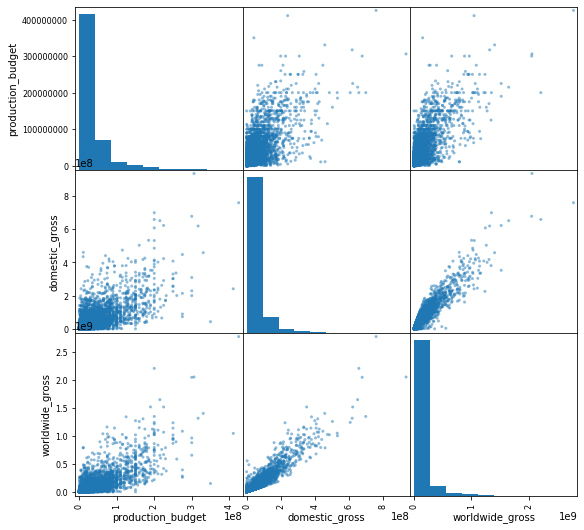

In [33]:
numeric_budgets = tn_movie_budgets.drop(['id','release_date'], axis=1)
pd.plotting.scatter_matrix(numeric_budgets, alpha=0.5, figsize=(9, 9))
plt.show()

Let's look at the percentiles for the columns in the `imdb.describe()`:

In [34]:
imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,65720.000000,65720.000000,65720.000000,6.572000e+04
mean,2014.258065,94.732273,6.320902,3.954674e+03
std,2.600143,209.377017,1.458878,3.208823e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.600000e+01
50%,2014.000000,91.000000,6.500000,6.200000e+01
75%,2016.000000,104.000000,7.300000,3.520000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


If our movie has more than 352 votes, then it has more votes than 75% of the data. Let's take a look at movies with more than 352 votes:

In [36]:
imdb_minimum = imdb.loc[(imdb['numvotes'] > 352)]

We'll consider this to be a minimum in terms of number of votes because it obviously wouldn't make sense to compare a movie with 1,000 votes and a movie with 2 votes. 


So what are we gonna do with this data? Let's take a look at the genres column because the it seems that handling the categorical data won't be a trivial task.


The following function will take in the imdb DataFrame and will return the most common genres. The function includes the DocString.

In [37]:
def most_common_genres(df):
    #creates dictionary where every key is a genre and value is the number of movies 
    #with belonging to that genre in the DataFrame provided as an argument. Returns the 
    #sorted dictionary by highest value to lowest. 
    most_genres = {}
    for movie in list(df['genres']):
        for genre in movie.split(','):
            if most_genres.get(genre) != None:
                most_genres[genre] += 1
            else:
                most_genres[genre] = 1
    keys = sorted(most_genres.keys(),key = lambda x: most_genres[x],reverse = True)
    values = sorted(most_genres.values(),reverse = True)
    most_genres = dict(zip(keys,values))
    return most_genres

In [38]:
most_commondict = most_common_genres(imdb_minimum)#Call our function

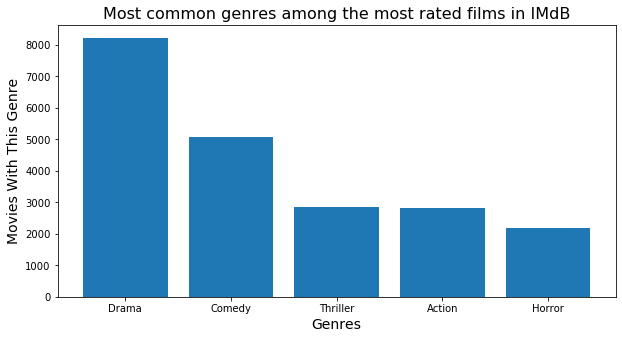

In [39]:
# Create Bar Graph
# Include descriptive titles and labels
plt.figure(figsize = (10,5))

plt.title('Most common genres among the most rated films in IMdB', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Movies With This Genre', fontsize=14)

plt.bar(list(most_commondict.keys())[:5], list(most_commondict.values())[:5])
plt.show()


Now let's get creative. Let's see how this distribution of genres changes when we go to higher rated movies.

In [40]:
def ratings_quantile(df, percentage):
    #Returns the movies with a ratings higher than the quantile 
    #provided as an argument.
    return df.loc[df['averagerating']>df['averagerating'].quantile(percentage)] 

In [41]:
eighty = ratings_quantile(imdb_minimum, 0.80)#Using Quartiles to keep movies with the highest 20% of vote counts
ninety = ratings_quantile(imdb_minimum, 0.9)
ninetynine = ratings_quantile(imdb_minimum, 0.99)

eightygenres = most_common_genres(eighty)#Using function to get most comon genre
ninetygenres = most_common_genres(ninety)
ninetyninegenres = most_common_genres(ninetynine)

eightygenres_normalized = {k: v/sum(eightygenres.values()) for k, v in eightygenres.items()}
ninetygenres_normalized = {k: v/sum(ninetygenres.values()) for k, v in ninetygenres.items()}
ninetyninegenres_normalized = {k: v/sum(ninetyninegenres.values()) for k, v in ninetyninegenres.items()}

[]

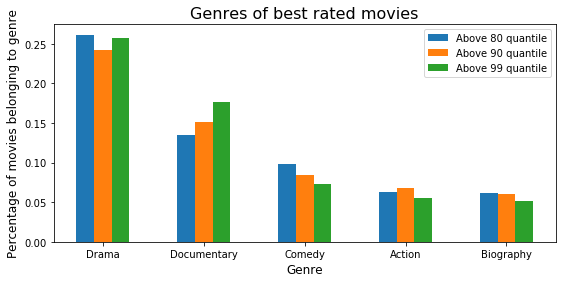

In [42]:

ind = np.arange(0,10,2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9,4))
eighty = ax.bar(ind - width, list(eightygenres_normalized.values())[:5], width,
                label='Above 80 quantile')
ninety = ax.bar(ind, list(ninetygenres_normalized.values())[:5], width,
                label='Above 90 quantile')
ninetynine = ax.bar(ind + width, list(ninetyninegenres_normalized.values())[:5], width,
                label='Above 99 quantile')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of movies belonging to genre',fontsize=12)
ax.set_title('Genres of best rated movies',fontsize=16)
ax.set_xticks(ind)
ax.set_xticklabels(list(eightygenres.keys()))
ax.set_xlabel('Genre',fontsize=12)
ax.legend()

ax.plot()


Now let's take a look at how these genre distributions have changed with the years:

In [43]:
genres10s = imdb_minimum.loc[(imdb_minimum['start_year'] == 2010)]
genres19s = imdb_minimum.loc[(imdb_minimum['start_year'] == 2019)]

genres10 = most_common_genres(genres10s)
genres19 = most_common_genres(genres19s)

g10_normalized = {k: v/sum(genres10.values()) for k, v in genres10.items()}
g19_normalized = {k: v/sum(genres19.values()) for k, v in genres19.items()}

[]

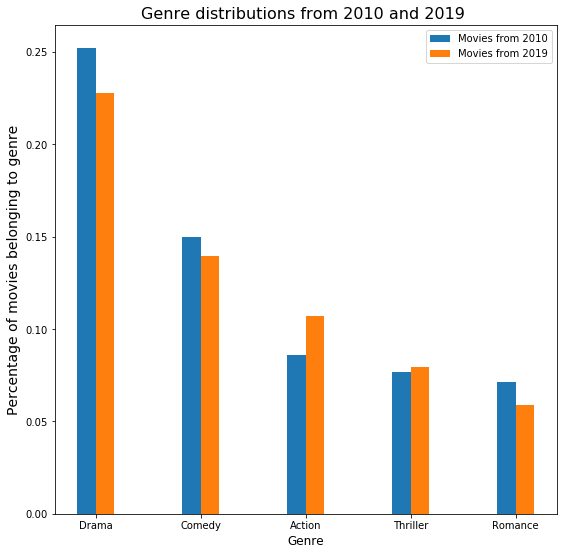

In [44]:
ind = np.arange(0,10,2)  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(9,9))
tens = ax.bar(ind - width/2, list(g10_normalized.values())[:5], width,
                label='Movies from 2010')
nineteen = ax.bar(ind+width/2, list(g19_normalized.values())[:5], width,
                label='Movies from 2019')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of movies belonging to genre',fontsize=14)
ax.set_title('Genre distributions from 2010 and 2019 ',fontsize=16)
ax.set_xticks(ind)
ax.set_xticklabels(list(g10_normalized.keys()))
ax.set_xlabel('Genre',fontsize=12)
ax.legend()

ax.plot()

Now let's take a look at the `tn_movie_budgets` DataFrame. One of the questions I asked at the beginning of this project is if there is a relationship between the release date of movies and their success.

Let's create a new column to represent the month of the year:

In [45]:
tn_movie_budgets['release_month'] = tn_movie_budgets['release_date'].map(lambda date: date.month)
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12


And now let's take a look the distribution of movies released by month with a hsitogram:

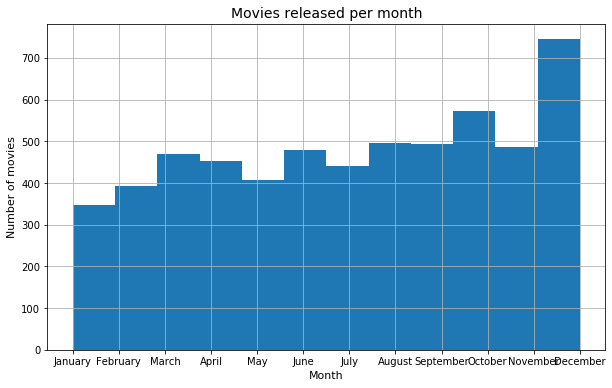

In [46]:
tn_movie_budgets.hist('release_month',bins=12, figsize=(10,6))
plt.ylabel('Number of movies',fontsize=11)
plt.title('Movies released per month',fontsize=14)
plt.xticks(list(range(1,13)),[
    'January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month',fontsize=11)
plt.show()

There doesn't seem to be a trend other than the fact that December is the month where the most movies are released. But now lets take a look at the at the movies with more earnings than 60% of the movies.

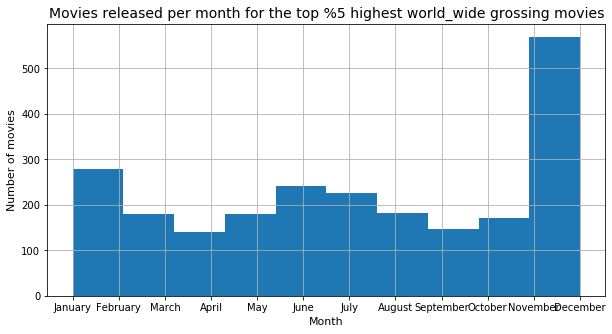

In [47]:
top_movies_worldwide = tn_movie_budgets.loc[
    tn_movie_budgets['worldwide_gross'] > tn_movie_budgets['worldwide_gross'].quantile(0.6)]

top_movies_worldwide.hist('release_month',figsize=(10,5))
plt.ylabel('Number of movies',fontsize=11)
plt.title('Movies released per month for the top %5 highest world_wide grossing movies',fontsize=14)
plt.xticks(list(range(1,13)),[
    'January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month',fontsize=11)
plt.show()

There seems to be a trend in this distribution in summer, but its quite small. There is also the same December spike. Now let's take a look at the movies at the top 5% of worldwide earnings:

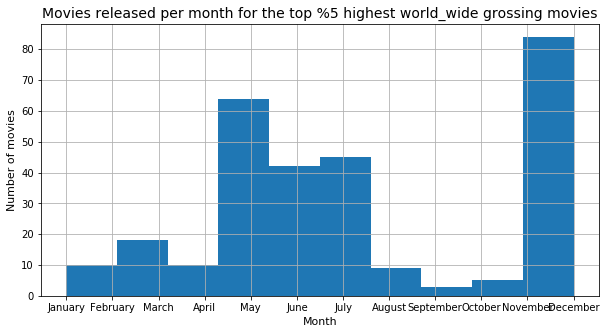

In [48]:
top_movies_worldwide = tn_movie_budgets.loc[
    tn_movie_budgets['worldwide_gross'] > tn_movie_budgets['worldwide_gross'].quantile(0.95)]

top_movies_worldwide.hist('release_month',figsize=(10,5))
plt.ylabel('Number of movies',fontsize=11)
plt.title('Movies released per month for the top %5 highest world_wide grossing movies',fontsize=14)
plt.xticks(list(range(1,13)),[
    'January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month',fontsize=11)
plt.show()

The seemingly small bump just go much bigger! There seems to be more box office releases in the summer, but personally surprising for me is the fact that even amongst the highest grossing movies, December is still king of release dates!

## 4. Drawing conclussions and business recommendations


Let's cut to the point and answer the 3 questions we posed in the beginning:
- *How does time of release affect movie success?*


The highest 5% grossing films are mostly released in the beginning of the summer or in the end of the year. Summer movies seem to be a real thing because we noticed that the december spike is always there, but as we focus on the highest grossing films there is an increase during summer.


- *What is the most succesful movie genre?*


For movies in general, there seems to be a trend in Drama, Comedy and Thriller movies. The common perception is one of the biggest genres is action, but the data shows that thriller is bigger than action. Instead of focusing solely on action movies, there should also be focus on thriller, if not more. We know this is a trend because since the database only deals with movies from the 2010 decade. On the other hand, the most common genres in the top rated movies are drama, documentary and comedy. The highest rated movies also have a sharp increase in documentary, so if what they're chasing for is ratings and quality content, that might be an excellent choice of genre to focus on. 


- *How has the genre distribution changed in the last couple of decades?*

By comparing the genre distributions from the beginning of the decade to the last year, we noticed that the 3 most popular movie genre for movies **in general** are Drama, Comedy and Action. There was a sharp increase in market share of Action movies, so we can say that the market trend is to create more Action films. 

## 5. Next steps

If given more time, the project could have used all of the DataFrames. More information is not necessarily always better, but there was a real limitation on the category of datas. When dealing with the IMdB for example, I didn't have information about release date or box office earnings. That is why I worked with two DataFrames in parallel but if given more time, I could have linked the movies with their box office numbers using their name.